# Clustering Aglomerativo Jerárquico

El Clustering Aglomerativo Jerárquico es un método de análisis de cluster que busca construir una jerarquía de clusters. A diferencia de los métodos de clustering no jerárquicos, este enfoque no requiere que especifiquemos el número de clusters de antemano. El proceso puede ser visualizado usando un dendrograma, que es un árbol que muestra la secuencia de uniones o divisiones.

## Proceso

El algoritmo del Clustering Aglomerativo Jerárquico sigue los siguientes pasos básicos:

1. **Inicialización**: Comienza tratando cada punto de datos como un cluster individual. Por lo tanto, si tenemos $N$ puntos de datos, empezamos con $N$ clusters.

2. **Cálculo de la matriz de proximidad**: Calcula la matriz de proximidad que contiene la distancia entre cada par de puntos o clusters. Las distancias comúnmente usadas son la distancia euclidiana, la distancia de Manhattan, o la distancia de Minkowski.

3. **Fusión de clusters**: Encuentra los dos clusters más cercanos y combínalos en un nuevo cluster. Esto reduce el número total de clusters en uno.

4. **Actualización de la matriz de proximidad**: Actualiza la matriz de proximidad para reflejar la distancia entre el nuevo cluster y los clusters originales.

5. **Repetición**: Repite los pasos 3 y 4 hasta que todos los puntos de datos estén en un solo cluster.

## Criterios de Enlace

El criterio de enlace determina cómo se mide la distancia entre conjuntos de observaciones. Los métodos más comunes son:

- **Enlace simple (mínimo)**: La distancia entre dos clusters es igual a la distancia más corta de cualquier miembro de un cluster a cualquier miembro del otro cluster.
  
  $$ d(A,B) = \min \{ d(a,b) : a \in A, b \in B \}$$

- **Enlace completo (máximo)**: La distancia entre dos clusters es igual a la distancia más larga de cualquier miembro de un cluster a cualquier miembro del otro cluster.
  
  $$d(A,B) = \max \{ d(a,b) : a \in A, b \in B \}$$

- **Enlace promedio**: La distancia entre dos clusters es el promedio de las distancias entre todos los pares de puntos en los dos clusters.
  
  $$ d(A,B) = \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a,b) $$

- **Enlace del centroide**: La distancia entre dos clusters es la distancia entre sus centroides.
  
  $$d(A,B) = d(c_A, c_B) $$

  donde $c_A$ y $c_B$ son los centroides de los clusters $A$ y $B$, respectivamente.

## Ventajas y Desventajas

### Ventajas

- No es necesario especificar el número de clusters de antemano.
- Produce un dendrograma, que ayuda a interpretar los datos.

### Desventajas

- Su complejidad computacional es relativamente alta, por lo que no es adecuado para conjuntos de datos grandes.
- Una vez que se fusionan dos clusters, no se pueden separar.

El Clustering Aglomerativo Jerárquico es especialmente útil para datos donde la estructura de los clusters es desconocida y queremos analizar las relaciones jerárquicas entre los objetos.

## Implementación en Python con Scikit-Learn
El paquete Scikit-Learn en Python ofrece una implementación eficiente del Clustering Aglomerativo Jerárquico a través de la clase AgglomerativeClustering. 

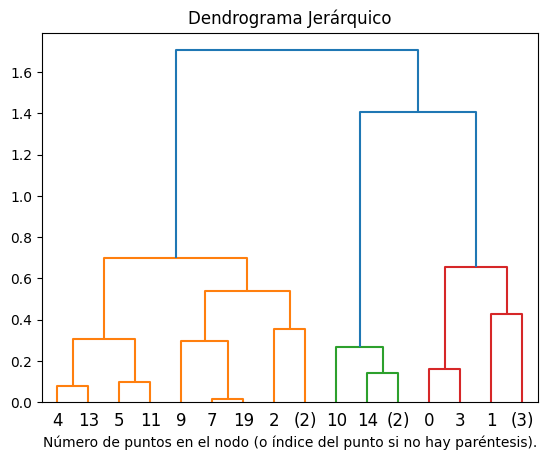

In [2]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Generar algunos datos de prueba 
X = np.random.rand(20, 2)

# Instanciar y ajustar el modelo
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(X)

# Función para trazar el dendrograma 
def plot_dendrogram(model, **kwargs):
    # Crear el conteo de muestras bajo cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # es una hoja
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Trazar el dendrograma correspondiente
    dendrogram(linkage_matrix, **kwargs)

# Trazar el dendrograma
plt.title('Dendrograma Jerárquico')
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Número de puntos en el nodo (o índice del punto si no hay paréntesis).")
plt.show()

# Clustering Basado en Densidad con DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering popular que se basa en la densidad de los datos. A diferencia de métodos como K-Means, DBSCAN no requiere que se especifique el número de clusters de antemano, y puede encontrar clusters de formas arbitrarias.

## Conceptos Clave

- **Densidad de un punto**: La densidad alrededor de un punto se mide por el número de puntos dentro de un radio especificado $\epsilon$ (eps).
- **Punto central**: Un punto es un punto central si hay al menos un número mínimo de puntos ($MinPts$) dentro de su radio $\epsilon$, incluido él mismo.
- **Punto frontera**: Un punto que no es un punto central pero está en el vecindario de un punto central.
- **Punto ruido**: Un punto que no es un punto central ni un punto frontera.

## Algoritmo

1. **Inicialización**: Todos los puntos se marcan inicialmente como no visitados.
2. **Para cada punto no visitado**:
   - Marcar el punto como visitado.
   - Si el punto es un punto central (tiene suficientes vecinos cercanos), se forma un nuevo cluster a partir de este y sus vecinos.
   - Los puntos frontera se añaden al cluster más cercano. Si un punto es un punto ruido, se deja temporalmente como no clasificado (puede ser considerado en un cluster más tarde).
3. **Iteración**: El proceso se repite para cada nuevo punto central encontrado, y los clusters se expanden con puntos frontera conectados.
4. **Terminación**: El algoritmo termina cuando todos los puntos han sido visitados y clasificados.

## Parámetros

- **eps ($\epsilon$)**: El radio de distancia para buscar puntos vecinos.
- **MinPts**: El número mínimo de puntos que se requiere para formar una región densa.

## Ventajas y Desventajas

### Ventajas

- Capaz de identificar clusters de formas complejas.
- Puede tratar con puntos de ruido.
- No necesita un número predefinido de clusters.

### Desventajas

- La elección de los parámetros $eps$ y $MinPts$ puede ser difícil sin el conocimiento previo del conjunto de datos.
- No funciona bien con datos de densidad variable.

## Implementación en Python con Scikit-Learn

El paquete Scikit-Learn en Python ofrece una implementación eficiente de DBSCAN a través de la clase DBSCAN.

Número estimado de clusters: 1
Número estimado de puntos de ruido: 95


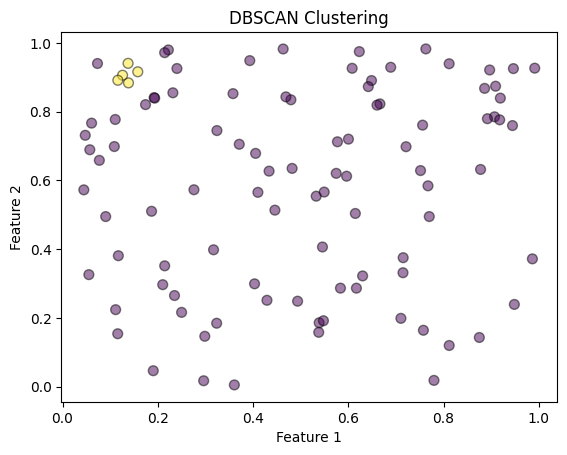

In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generar algunos datos de prueba
X = np.random.rand(100, 2)

# Instanciar y ajustar el modelo DBSCAN
# eps es la distancia máxima entre dos muestras para que se consideren en el mismo vecindario
# min_samples es el número de muestras en un vecindario para que un punto se considere como un punto central
dbscan = DBSCAN(eps=0.05, min_samples=5).fit(X)

# Etiquetas de los clusters
labels = dbscan.labels_

# Número de clusters en las etiquetas, ignorando el ruido si está presente
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de puntos de ruido: %d' % n_noise_)

# Gráfico de los clusters y puntos de ruido
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', marker='o', 
            edgecolor='k', s=50, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Consideraciones

- DBSCAN es especialmente útil para datos donde los clusters tienen formas arbitrarias y no se pueden separar fácilmente con un hiperplano. También es útil para datos con ruido, ya que puede identificar puntos de ruido como tales.

- La elección de los parámetros $eps$ y $MinPts$ es crucial para el rendimiento de DBSCAN. Una regla general es que $eps$ debe ser elegido de tal manera que un punto tenga al menos $MinPts$ vecinos dentro de su radio.

- DBSCAN no es adecuado para datos de alta dimensionalidad, ya que la distancia euclidiana puede perder significado en espacios de alta dimensión.

- La visualización de los resultados de DBSCAN puede ser difícil, ya que los clusters pueden tener formas arbitrarias y no se pueden separar fácilmente con un hiperplano.

- DBSCAN es util para datos de forma arbitraria y ruidosos, pero no es adecuado para datos de densidad variable.


# Clustering Espectral

El Clustering Espectral es una técnica de aprendizaje automático no supervisado que se utiliza para agrupar puntos de datos similares en el mismo cluster. A diferencia de los algoritmos de clustering tradicionales, que realizan agrupaciones basadas en la distancia euclidiana entre puntos de datos, el Clustering Espectral se basa en la noción de conectividad y similitud entre los puntos de datos, lo cual lo hace especialmente bueno para identificar clusters en datos que no son linealmente separables.

## Conceptos Clave

El Clustering Espectral se basa en la teoría de grafos. Los datos se modelan como un grafo, donde los nodos representan los puntos de datos y las aristas representan la similitud entre estos puntos. El objetivo es particionar el grafo de manera que los cortes entre diferentes grupos (clusters) tengan un peso bajo (poca similitud entre grupos) y dentro de los mismos grupos tengan un peso alto (alta similitud dentro del grupo).

### Pasos del Algoritmo

1. **Construir la Matriz de Similitud**: Primero, se construye una matriz de similitud $S$ que captura la cercanía entre cada par de puntos en el conjunto de datos. Una forma común de definir la similitud es a través de la función de similitud gaussiana (también conocida como el kernel radial de base gaussiana - RBF), donde $S_{ij} = \exp(-\frac{||x_i - x_j||^2}{2\sigma^2})$.

2. **Construir el Laplaciano del Grafo**: A partir de la matriz de similitud, se construye el laplaciano del grafo, $L = D - S$, donde $D$ es la matriz diagonal de grados que contiene las sumas de las similitudes para cada punto de datos.

3. **Descomposición de Valores Propios**: Se calculan los vectores y valores propios del laplaciano del grafo.

4. **Formación de Clusters**: Los vectores propios que corresponden a los k valores propios más pequeños se utilizan para formar una nueva representación de los datos de menor dimensión, sobre la cual se aplica un algoritmo de clustering tradicional, como K-means, para identificar los clusters.

## Implementación en Python con Scikit-Learn

Scikit-Learn facilita la implementación del Clustering Espectral a través de su clase `SpectralClustering`. 

/home/izainea/miniconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


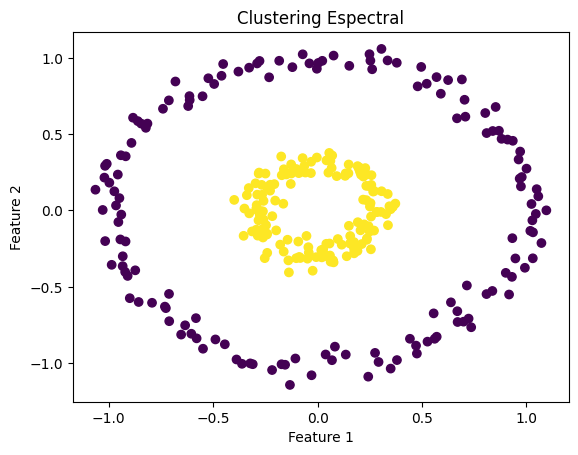

In [5]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generar datos de prueba
X, _ = make_circles(n_samples=300, factor=.3, noise=.05)

# Aplicar Clustering Espectral
clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                                assign_labels='kmeans')
labels = clustering.fit_predict(X)

# Visualización de los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('Clustering Espectral')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



Este código genera un conjunto de datos sintético y aplica Clustering Espectral para identificar dos clusters. La visualización resultante muestra cómo el Clustering Espectral puede identificar clusters en datos que no son linealmente separables, lo que sería difícil para algoritmos basados en distancias euclidianas como K-means.

## Consideraciones

- El parámetro `affinity` determina cómo se calcula la similitud entre los puntos de datos. `nearest_neighbors` es útil para datos densamente distribuidos, mientras que `rbf` (por defecto) funciona bien para una gama más amplia de casos.
- El número de clusters `n_clusters` y el método para `assign_labels` (por defecto es 'kmeans') son parámetros importantes que pueden influir en la calidad del clustering.
- El Clustering Espectral es computacionalmente más costoso que algoritmos como K-means, especialmente para conjuntos de datos grandes.



La Propagación de Afinidad (Affinity Propagation) es un algoritmo de clustering que, a diferencia de métodos como K-Means, no requiere que el número de clusters sea determinado antes de la ejecución del algoritmo. Basado en el concepto de "paso de mensajes" entre puntos de datos, Affinity Propagation identifica clusters mediante la identificación de ejemplares, que son miembros representativos de los clusters.

## Conceptos Clave

### Ejemplares
Los ejemplares son puntos de datos seleccionados como representantes de un cluster. Cada punto de datos es asignado a un ejemplar, que es el más adecuado para representar su cluster.

### Similitud
La similitud $s(i, k)$ entre dos puntos $i$ y $k$ mide qué tan bien el punto $k$ es adecuado para ser el ejemplar para el punto $i$. Generalmente, se utiliza el negativo del cuadrado de la distancia euclidiana.

La similitud $s(i, k)$ entre dos puntos $i$ y $k$ es generalmente el negativo del cuadrado de la distancia euclidiana entre los dos puntos:

$$ s(i, k) = -||x_i - x_k||^2 $$

donde $x_i$ y $x_k$ son los vectores de características de los puntos de datos $i$ y $k$, respectivamente. Para el punto que se considera como posible ejemplar, se le asigna una similitud $s(k, k)$ que es un valor de entrada llamado **preferencia**. La preferencia afecta al número de clusters: valores más altos conducen a más clusters.

### Responsabilidad
La responsabilidad $r(i, k)$ refleja qué tan bien el punto $k$ se adapta a ser el ejemplar para el punto $i$, considerando otros puntos candidatos para ejemplar de $i$.

La responsabilidad $r(i, k)$ refleja qué tan bien el punto de datos $k$ se adecúa para servir como ejemplar para el punto $i$, en comparación con otros candidatos ejemplares para $i$. Se calcula como:

$$ r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} \{ a(i, k') + s(i, k') \} $$

donde $a(i, k)$ es la disponibilidad (definida a continuación) del punto $k$ para ser ejemplar del punto $i$, y el $\max$ se calcula sobre todos los puntos $k'$ diferentes de $k$.

### Disponibilidad
La disponibilidad $a(i, k)$ indica qué tan apropiado es para el punto $i$ elegir al punto $k$ como su ejemplar, considerando el apoyo de otros puntos que $k$ debería ser un ejemplar.

La disponibilidad $a(i, k)$ refleja qué tan apropiado es para el punto $i$ elegir al punto $k$ como su ejemplar, considerando el apoyo de otros puntos para que $k$ sea el ejemplar. La disponibilidad se inicializa en cero y se actualiza según la siguiente regla:

$$ a(i, k) \leftarrow \min \left( 0, r(k, k) + \sum_{i' \not\in \{i, k\}} \max(0, r(i', k)) \right) $$

para todos los puntos $i$ diferentes de $k$, y la disponibilidad de $k$ para ser su propio ejemplar se actualiza como:

$$ a(k, k) \leftarrow \sum_{i' \neq k} \max(0, r(i', k)) $$



### Actualización y Convergencia

Los mensajes de responsabilidad y disponibilidad se actualizan iterativamente hasta que el proceso converge, lo que suele ocurrir cuando los cambios en las responsabilidades y disponibilidades se vuelven insignificantes a lo largo de varias iteraciones, o se alcanza un número máximo de iteraciones. Después de la convergencia, los ejemplares se eligen donde la suma de la responsabilidad y la disponibilidad es positiva:

$$ e(k) = r(k, k) + a(k, k) > 0 $$

Cada punto de datos se asigna al ejemplar que tiene la mayor suma de responsabilidad y disponibilidad.

### Elección de Parámetros

- **Preferencia**: La preferencia (similitud de un punto hacia sí mismo) puede ser la misma para todos los puntos o variar entre ellos. Su valor influye directamente en el número de clusters encontrados por el algoritmo.

Affinity Propagation es efectivo en muchos escenarios donde la relación entre los puntos de datos no se describe bien por la distancia euclidiana, permitiendo el descubrimiento de clusters basados en una noción más general de "similitud". La elección cuidadosa de la preferencia y la comprensión de la naturaleza de los datos son cruciales para obtener buenos resultados con este método.

## Algoritmo

1. **Inicialización**: La matriz de similitud se inicializa basada en la distancia entre los puntos de datos. Las matrices de responsabilidad y disponibilidad se inicializan a cero.

2. **Actualización de la responsabilidad**: La responsabilidad se actualiza para reflejar qué tan bien el punto $k$ sirve como ejemplar para el punto $i$, en comparación con otros candidatos ejemplares para $i$.

3. **Actualización de la disponibilidad**: La disponibilidad se actualiza para reflejar el apoyo que el punto $i$ recibe de $k$ para ser su ejemplar, considerando el apoyo de otros puntos para $k$ como ejemplar.

4. **Criterio de convergencia**: El proceso se repite hasta que los criterios de convergencia se cumplen (por ejemplo, los cambios en las matrices de responsabilidad y disponibilidad están por debajo de un umbral durante cierto número de iteraciones).

5. **Identificación de ejemplares y formación de clusters**: Los puntos se asignan a los mismos clusters que sus ejemplares respectivos.

## Implementación en Python con Scikit-Learn

Scikit-Learn ofrece una implementación sencilla de Affinity Propagation.

Este código genera un conjunto de datos aleatorios y utiliza Affinity Propagation para identificar clusters y sus ejemplares. Los ejemplares se marcan con una 'X' roja en la visualización.


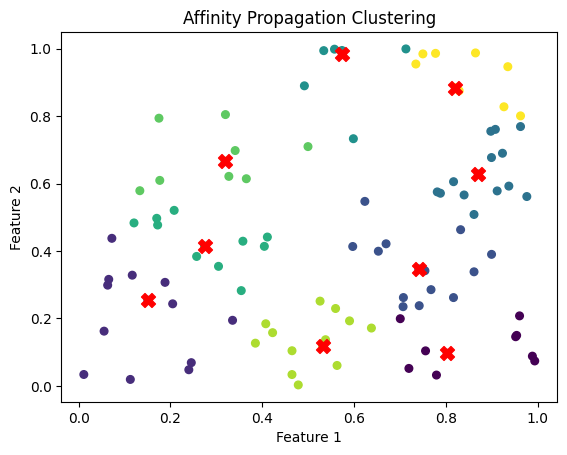

In [6]:
from sklearn.cluster import AffinityPropagation
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de prueba
X = np.random.rand(100, 2)  # Por ejemplo, 100 puntos en 2D

# Instanciar y ajustar el modelo de Propagación de Afinidad
clustering = AffinityPropagation(random_state=5).fit(X)

# Etiquetas de los clusters
labels = clustering.labels_

# Identificar los índices de los ejemplares
cluster_centers_indices = clustering.cluster_centers_indices_

# Visualización de los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=30)
plt.scatter(X[cluster_centers_indices, 0], X[cluster_centers_indices, 1],
            s=100, c='red', marker='X')  # Marcar ejemplares
plt.title('Affinity Propagation Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Consideraciones

- Affinity Propagation puede ser más costoso computacionalmente en comparación con otros algoritmos de clustering, especialmente para conjuntos de datos grandes.
- La elección de la métrica de similitud puede tener un impacto significativo en los resultados del clustering.
- Este algoritmo puede producir un número diferente de clusters en diferentes ejecuciones, debido a su naturaleza iterativa y al impacto del estado inicial aleatorio.
